__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

Bueno, antes que nada nos traemos a derivada_numerica a este notebook:

In [1]:
function f(x);
    cos(x)
end;

In [2]:
function derivada_numerica(f,x,h)
    f_prima = (f(x+h)-f(x))/h
    return f_prima
end;

In [3]:
#Primero observamos de manera manual como converge la derivada a la derivada exacta entre el h sea menor:
#sea x= 0.5

derivada_numerica(f,0.5,0.1)

-0.5224694698069443

In [4]:
derivada_numerica(f,0.5,0.001) #En efecto, entre menor h, mas se acerca al valor real

-0.479864249944395

In [5]:
using PyPlot

In [26]:
#Para graficar, nos basamos en una función hecha y explicada en tarea 7:

function grafica_convergencia(f,x,h)
    lista_h = collect(h)
    lista_derivada = []
    r = 0.0 
    for i in 1:length(lista_h)
        r = derivada_numerica(f,x,lista_h[i])
        push!(lista_derivada,r)
    end
    xlabel("1/h")
    ylabel("Derivada de cos(0.5)")
    title("Convergencia al valor exacto de la derivada")
    plot(1/h,fill(-0.4794255386,length(lista_h)),color="y") #La asintota del valor exacto
    plot(1/h,lista_derivada,color="r")
end;

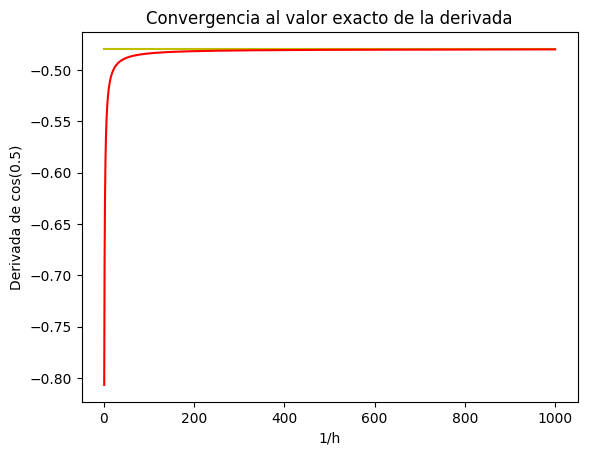

In [27]:
grafica_convergencia(f,0.5,linspace(1,0.001,1000));

_Esta gráfica comprueba de que entre mayor el valor de $\frac{1}{h}$ (en otras palabras, si $h$ es cada vez menor), la derivada converge a la derivada exacta con $x=0.5$_

Ahora obtendremos el error relativo, __nota__  $\Delta f(x_0,h)=f(x_0+h)-f(x_0)$. y $f'(x_0)$ es la derivada real, que podemos calcular de manera ajena a estos algoritmos

In [8]:
function error_relativo(f,x,h,der_real)
    error = abs((derivada_numerica(f,x,h)-der_real)/der_real) #Vemos que Delta{f(x,h)}/h es la def. de derivada.
    return error
end;

In [9]:
error_relativo(f,0.5,0.001,-0.4794255386) #Según la calculadora de google, -sin(0.5) = -0.4794255386

0.000915077126838417

In [10]:
function grafica_error_relativo(f,x,h,der_real)
    lista_h = collect(h)
    lista_err = []
    r = 0.0 
    for i in 1:length(lista_h)
        r = error_relativo(f,x,lista_h[i],der_real)
        push!(lista_err,r)
    end
    xlabel("h")
    ylabel("Error relativo")
    plot(h,lista_err,color="g")
end;

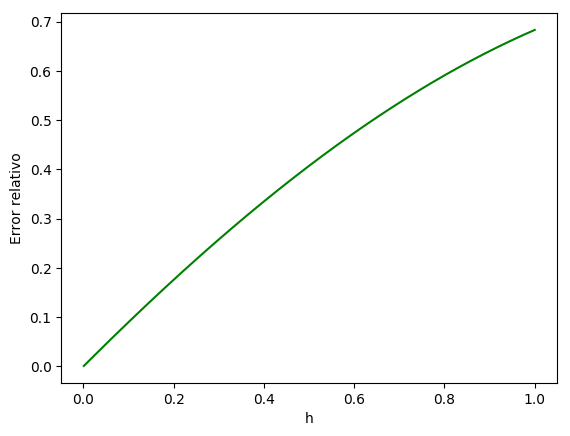

In [11]:
grafica_error_relativo(f,0.5,linspace(1,0.001,1000),-0.4794255386);

_Como debía de esperarse, el valor relativo es menor mientras mas pequeño $h$ se define_

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

Si es posible. Veamos la expansión de la serie de Taylor de $f(x+h)$ alrededor de $h=0$:

$$
f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Calculamos la expansión de la serie de Taylor para $f(x-h)$ alrededor de $h=0$:

$$
f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Ahora restamos $f(x+h)-f(x-h)$:

$$
f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \frac{h^{3}}{3} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{5}\right)
$$

Tomando solo hasta el término de la derivada:

$$
f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{3}\right)
$$

Sabemos que: 

$$
\Delta f(x,h)=f(x+h)-f(x)
$$

Reemplazamos lo siguiente:

$$
f'(x)=\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}
$$

Por lo tanto

$$
\Delta f(x,h)=2h f'(x)+ \mathcal{O}\left(h^{3}\right)
$$

Finalmente despejando tenemos que:

$$
\frac{\Delta f(x,h)}{2h}-f'(x)=\mathcal{O}\left(h^{2}\right)
$$

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

Sólo es aplicar la definición de derivada simétrica en vez de derivada común. Procedemos a definir una función:

In [12]:
function derivada_simetrica(f,x,h)
    f_prima = (f(x+h)-f(x-h))/(2h) #p.d. derivada simetrica
    return f_prima
end;

In [13]:
derivada_simetrica(f,0.5,0.01)

-0.4794175482185081

In [14]:
function error_simetrico(f,x,h,der_real)
    error = derivada_simetrica(f,x,h)-der_real
    return error
end;

In [15]:
error_simetrico(f,0.5,0.001,-0.4794255386) #Desde aquí se nota la mejoría

7.990005529423527e-8

In [28]:
function grafica_convergencia_simetrica(f,x,h)
    lista_h = collect(h)
    lista_derivada = []
    r = 0.0 
    for i in 1:length(lista_h)
        r = derivada_simetrica(f,x,lista_h[i])
        push!(lista_derivada,r)
    end
    xlabel("1/h")
    ylabel("Derivada de cos(0.5)")
    title("Convergencia al valor exacto de la derivada")
    plot(1/h,fill(-0.4794255386,length(lista_h)),color="y")
    plot(1/h,lista_derivada,color="r")
end;

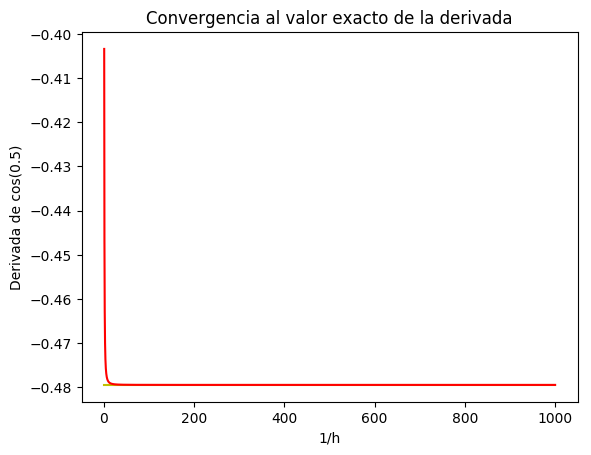

In [30]:
grafica_convergencia_simetrica(f,0.5,linspace(1,0.001,1000));

In [18]:
function grafica_error_simetrico(f,x,h,der_real)
    lista_h = collect(h)
    lista_err = []
    r = 0.0 
    for i in 1:length(lista_h)
        r = error_simetrico(f,x,lista_h[i],der_real)
        push!(lista_err,r)
    end
    xlabel("h")
    ylabel("Error simetrico")
    plot(h,lista_err,color="y")
end;

_Comparando con ejercicio 2, Se requiere un h relativamente mayor para converger a la derivada real._

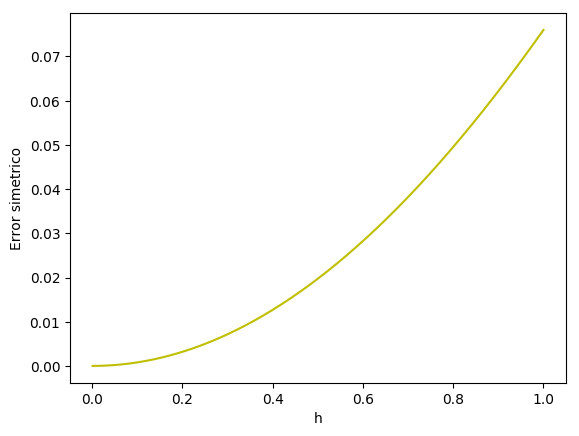

In [19]:
grafica_error_simetrico(f,0.5,linspace(1,0.001,1000),-0.4794255386);

_Desde una perspectiva geometrica, resulta mas conveniente tener una parabola que una figura como la del ejercicio 2. De manera general le toma un h mayor alcanzar la misma magnitud del error._

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Un operador lineal cumple con dos propiedades, la aditiva y de homogeneidad.

Sea $f$,$g$ funciones y $\alpha$ un escalar, se tiene que:

$$
\Delta_{h} (\alpha f +g) = \alpha \Delta_{h}(f) +\Delta_{h}(g)
$$ 

$$
\Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n(\alpha f +g)}{dx^n}
$$

Usando la linealidad del operador derivada 

$$ \Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \frac{h^n}{n!}\left[\alpha \frac{d^n f}{dx^n} +\frac{d^n g}{dx^n}\right]$$

Distributividad

$$\Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \left[\alpha\frac{h^n}{n!}\frac{d^n f}{dx^n} + \frac{h^n}{n!} \frac{d^n g}{dx^n}\right]$$

Usando la linealidad del operador suma 

$$ \Delta_{h}(\alpha f +g) = \alpha \sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^n} +\sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^n}$$

$$\Delta_{h}(\alpha f +g) = \alpha \Delta_{h}(f) +\Delta_{h}(g)$$

__Por lo tanto, queda demostrado que $\Delta_h$ es un operador lineal__

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Partimos de lo siguiente:

$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Sumamos un neutro aditivo $ 0 = 1-1$

$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}+1-1$$

Por lo que:

$$\Delta_h=\sum_{n=0}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}-1$$

Sabemos que la serie de Taylor de la función exponencial es la siguiente:

$$ e^{x} = \sum_{n=0}^{\infty}\frac{x^n}{n!} $$

Y como, en nuestro caso, el argumento de la función exponencial es $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, tenemos que:

$$\Delta_h= e^{\left(\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}\right)}-1$$